In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

# Исследование факторов, влияющих на возникновение сердечно-сосудистых заболеваний

## 1. Описание задачи

Какие привычки и образ жизни способствуют профилактике сердечно-сосудистых заболеваний? Какие же, наоборот, увеличивают риск их возникновения? На эти и другие вопросы мы попытаемся дать ответ, исследовав данный датасет, основанный на данных опроса, проведенного Центром по контролю и профилактике заболеваний (CDC). В опросе участвовали более 400 тысяч взрослых, которые делились информацией о своем здоровье, питании, физической активности, курении, алкоголе и других аспектах своей повседневной жизни. Исследуя этот датасет, мы можем попытаться выявить, какие факторы наиболее сильно коррелируют с наличием или отсутствием сердечно-сосудистых заболеваний у респондентов, а также построить модель, которая может предсказать вероятность таких заболеваний на основе данных опроса. Это может помочь нам понять, как лучше заботиться о своем сердце и сосудах, а также как определить свой уровень риска и принять необходимые меры для его снижения.

### Цель:
* На основе информации о человеке определить наличие у него сердечно-сосудистых заболеваний.

### Описание датасета:
* Всего данных: 445132
* Процент пропущенных значений: 5%
* Количество признаков: 40
* Количество классов: 2
* Несбалансированные классы: 94% - не имеют сердечно-сосудистых заболеваний на момент опроса, 6% - имеют

### Описание признаков:
* State - Штат, в котором проживает человек (категориальный)
* Sex - Пол (категориальный)
* GeneralHealth - Общее состояние здоровья (категориальный)
* PhysicalHealthDays - Количество дней за последние 30 дней, когда человек чувствовал себя физически плохо (количественный)
* MentalHealthDays - Количество дней за последние 30 дней, когда человек чувствовал себя психически плохо (количественный)
* LastCheckupTime - Когда был последний медицинский осмотр (категориальный)
* PhysicalActivities - Ведет ли человек активный образ жизни (бинарный)
* SleepHours - Среднее время сна (количественный)
* RemovedTeeth - Количество удаленных зубов (категориальный)
* HadHeartAttack - Были ли сердечно-сосудистые заболевания (бинарный)
* HadAngina - Была ли стенокардия - (бинарный)
* HadStroke - Был ли инсульт - (бинарный)
* HadAsthma - Была ли астма - (бинарный)
* HadSkinCancer - Был ли рак кожи (бинарный)
* HadCOPD - Была ли хроническая обструктивная болезнь легких (бинарный)
* HadDepressiveDisorder - Была ли депрессия (бинарный)
* HadKidneyDisease - Была ли болезнь почек (бинарный)
* HadArthritis - Был ли артрит (бинарный)
* HadDiabetes - Был ли диабет (категориальный)
* DeafOrHardOfHearing - Есть ли проблемы со слухом (бинарный)
* BlindOrVisionDifficulty - Имеет ли проблемы со зрением или слепоту (бинарный)
* DifficultyConcentrating - Есть ли проблемы с концентрацией (бинарный)
* DifficultyWalking - Есть ли трудности с ходьбой (бинарный)
* DifficultyDressingBathing - Есть ли трудности с одеванием или купанием ?(бинарный)
* DifficultyErrands - Есть ли трудности с выполнением поручений (бинарный)
* SmokerStatus - Отношение к курению(курит, бросил и т.д.) (категориальный)
* ECigaretteUsage - Использует ли электронные сигареты (категориальный)
* ChestScan - Делал ли сканирование органов грудной клетки (бинарный)
* RaceEthnicityCategory - Раса и этническая принадлежность (категориальный)
* AgeCategory - К какой возрастной категории относится (категориальный)
* HeightInMeters - Рост в метрах (количественный)
* WeightInKilograms - Вес в килограммах (количественный)
* BMI - Индекс массы тела (количественный)
* AlcoholDrinkers - Пьет ли алкоголь (бинарный)
* HIVTesting - Положительный или отрицательный тест на ВИЧ (бинарный)
* FluVaxLast12 - Делал ли прививку от гриппа за последние 12 месяцев (бинарный)
* PneumoVaxEver - Делал ли прививку от пневмококка когда-либо (бинарный)
* TetanusLast10Tdap - Делал ли прививку от столбняка за последние 10 лет (категориальный)
* HighRiskLastYear - Был ли в высокой группе риска заболеваний сердца в течение последнего года (бинарный)
* CovidPos - Результат теста на COVID (категориальный)




## 2. Чтение данных

In [2]:
url = "https://media.githubusercontent.com/media/Artifeex/MachineLearning/main/heart_2022_with_nans.csv"
data_raw = pd.read_csv(url)

In [31]:
data_raw.shape # 445132 - строк, 40 - столбцов

(445132, 40)

In [32]:
data_raw.head(5) # первые 5 строк нашей таблицы

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [33]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## 3. Визуализация данных и их основные характеристики


Информация о числовых признаках:

In [34]:
data_raw.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


Конвертируем типы для наших категориальных признаков из типа object в categorical

In [3]:
data_raw['State'] = data_raw['State'].astype('category')
data_raw['Sex'] = data_raw['Sex'].astype('category')
data_raw['GeneralHealth'] = data_raw['GeneralHealth'].astype('category')
data_raw['LastCheckupTime'] = data_raw['LastCheckupTime'].astype('category')
data_raw['PhysicalActivities'] = data_raw['PhysicalActivities'].astype('category')
data_raw['RemovedTeeth'] = data_raw['RemovedTeeth'].astype('category')
data_raw['HadHeartAttack'] = data_raw['HadHeartAttack'].astype('category')
data_raw['HadAngina'] = data_raw['HadAngina'].astype('category')
data_raw['HadStroke'] = data_raw['HadStroke'].astype('category')
data_raw['HadAsthma'] = data_raw['HadAsthma'].astype('category')
data_raw['HadSkinCancer'] = data_raw['HadSkinCancer'].astype('category')
data_raw['HadCOPD'] = data_raw['HadCOPD'].astype('category')
data_raw['HadDepressiveDisorder'] = data_raw['HadDepressiveDisorder'].astype('category')
data_raw['HadKidneyDisease'] = data_raw['HadKidneyDisease'].astype('category')
data_raw['HadArthritis'] = data_raw['HadArthritis'].astype('category')
data_raw['HadDiabetes'] = data_raw['HadDiabetes'].astype('category')
data_raw['DeafOrHardOfHearing'] = data_raw['DeafOrHardOfHearing'].astype('category')
data_raw['BlindOrVisionDifficulty'] = data_raw['BlindOrVisionDifficulty'].astype('category')
data_raw['DifficultyConcentrating'] = data_raw['DifficultyConcentrating'].astype('category')
data_raw['DifficultyWalking'] = data_raw['DifficultyWalking'].astype('category')
data_raw['DifficultyDressingBathing'] = data_raw['DifficultyDressingBathing'].astype('category')
data_raw['DifficultyErrands'] = data_raw['DifficultyErrands'].astype('category')
data_raw['SmokerStatus'] = data_raw['SmokerStatus'].astype('category')
data_raw['ECigaretteUsage'] = data_raw['ECigaretteUsage'].astype('category')
data_raw['ChestScan'] = data_raw['ChestScan'].astype('category')
data_raw['RaceEthnicityCategory'] = data_raw['RaceEthnicityCategory'].astype('category')
data_raw['AgeCategory'] = data_raw['AgeCategory'].astype('category')
data_raw['AlcoholDrinkers'] = data_raw['AlcoholDrinkers'].astype('category')
data_raw['HIVTesting'] = data_raw['HIVTesting'].astype('category')
data_raw['FluVaxLast12'] = data_raw['FluVaxLast12'].astype('category')
data_raw['PneumoVaxEver'] = data_raw['PneumoVaxEver'].astype('category')
data_raw['TetanusLast10Tdap'] = data_raw['TetanusLast10Tdap'].astype('category')
data_raw['HighRiskLastYear'] = data_raw['HighRiskLastYear'].astype('category')
data_raw['CovidPos'] = data_raw['CovidPos'].astype('category')

In [36]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      445132 non-null  category
 1   Sex                        445132 non-null  category
 2   GeneralHealth              443934 non-null  category
 3   PhysicalHealthDays         434205 non-null  float64 
 4   MentalHealthDays           436065 non-null  float64 
 5   LastCheckupTime            436824 non-null  category
 6   PhysicalActivities         444039 non-null  category
 7   SleepHours                 439679 non-null  float64 
 8   RemovedTeeth               433772 non-null  category
 9   HadHeartAttack             442067 non-null  category
 10  HadAngina                  440727 non-null  category
 11  HadStroke                  443575 non-null  category
 12  HadAsthma                  443359 non-null  category
 13  HadSkinCancer 

Информация о категориальных признаках:

In [37]:
data_raw.describe(include=['category'])

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,436824,444039,433772,442067,440727,443575,443359,...,389086,431075,436053,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,350944,337559,233455,416959,414176,424336,376665,...,223221,320421,47099,210891,249919,209256,215604,121493,377324,270055


Построим матрицу корреляции для наших числовых признаков и попытаемся определить и объяснить какие-то интересные для нас корреляции признаков

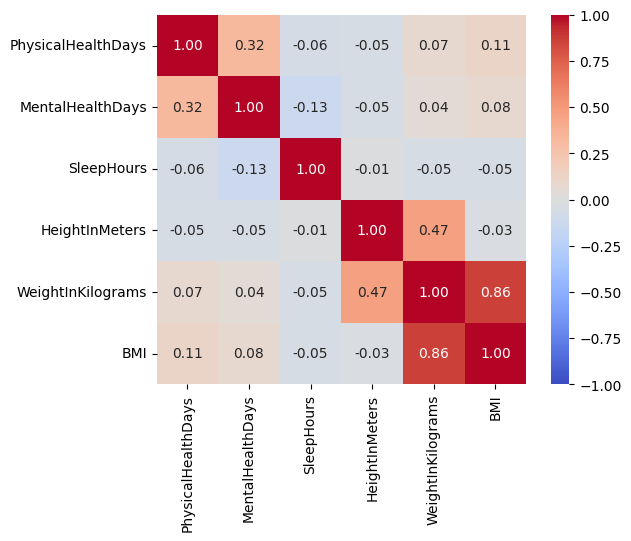

In [38]:
corr_matrix = data_raw.corr(numeric_only=True)
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Как видим, прослеживаются следующие корреляции:
* Самая большая корреляция между индексом массы тела и массой человека. Чем больше масса тела, тем больше индекс массы тела. Не представляет какого-либо интереса, так как прямая корреляция между этими признаками очевидна.
* Второй по величине корреляцией является рост и вес человека. Чем больше рост, тем больше и вес. Тоже достаточно очевидная корреляция, так как обычно более высокие люди так же и весят больше (как минимум на это должна влиять длина конечностей и вес костей).
* Существует корреляция между количеством ментально и физически плохих дней. Логика в этом есть, так как, если человек чувствует себя плохо физически, то это может влиять и на психическое состояние, так и наоборот.
* Прослеживаются и другие корреляции, например, между индексом массы тела и количеством дней, когда человек чувствовал себя физически плохо, но это достаточно маленькие значения. О них стоит помнить, но не заострять на них внимание.


Теперь посмотрим на корреляция различных факторов и наличием сердечно сосудистых заболеваний

### Пол человека

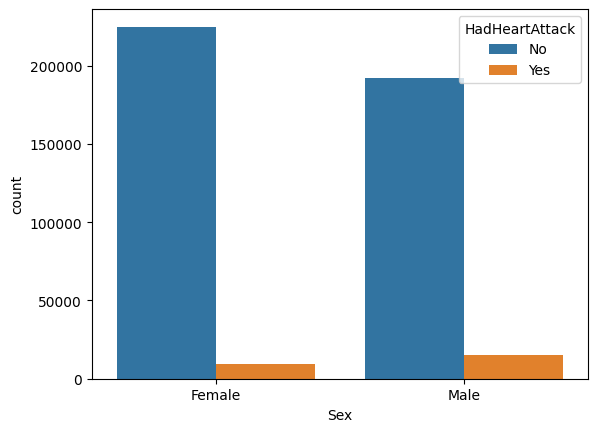

In [4]:
sns.countplot(data=data_raw,x='Sex', hue='HadHeartAttack')
pass

По диаграмме мы можем сделать вывод, что мужчины сталкиваются с сердечно-сосудистыми заболеваниями чаще, чем женщины. Причем, несмотря на то, что женщин в наших данных больше, чем мужчин, оранжевая колонка у мужчин больше, чем у женщин. Следовательно, можем точно сделать вывод о том, что пол человека - признак, имеющий влияние на возникновение проблем с сердцем.

### Возрастная группа-

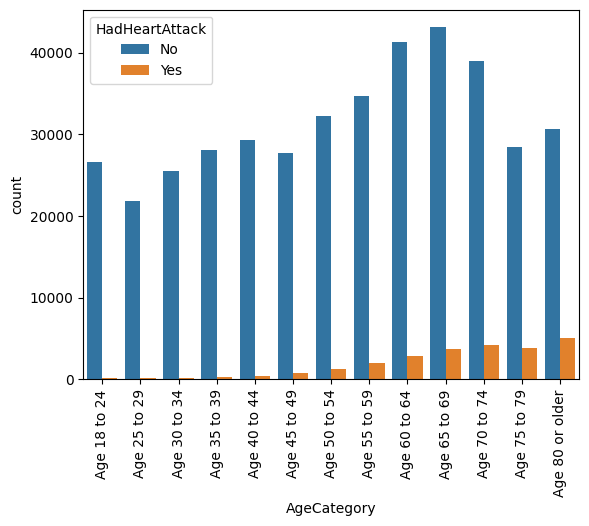

In [40]:
plt.xticks(rotation=90)
sns.countplot(data=data_raw,x='AgeCategory', hue='HadHeartAttack')
pass

По диграмме мы можем сделать вывод, что сердечно-сосудистым заболеваниям больше всего подвержены люди старше 80 лет,а так же люди, чей возраст находится в промежутке между 70-ью и 74-мя годами.

### Физическая активность

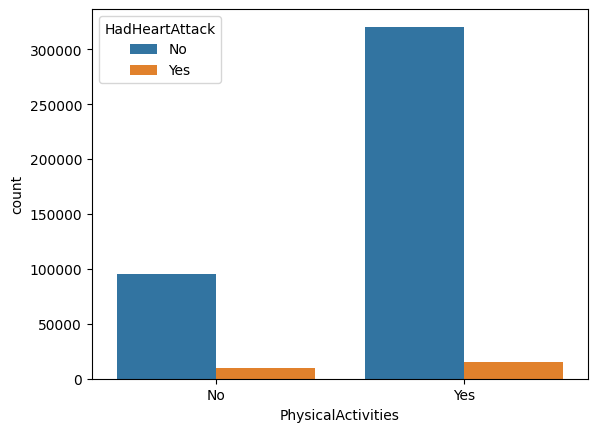

In [41]:
sns.countplot(data=data_raw,x='PhysicalActivities', hue='HadHeartAttack')
pass

In [42]:
activePeopleWithHeartAttack = len(data_raw[(data_raw['PhysicalActivities'] == 'Yes') & (data_raw['HadHeartAttack'] == 'Yes')])
activePeopleAtAll = len(data_raw[(data_raw['PhysicalActivities'] == 'Yes')])

nonActivtePeopleWithHeartAttack = len(data_raw[(data_raw['PhysicalActivities'] == 'No') & (data_raw['HadHeartAttack'] == 'Yes')])
nonActivtePeopleAtAll = len(data_raw[(data_raw['PhysicalActivities'] == 'No')])

(activePeopleWithHeartAttack / activePeopleAtAll) * 100 , (nonActivtePeopleWithHeartAttack / nonActivtePeopleAtAll) * 100

(4.528097310396109, 9.139744552967693)

Несмотря на то, что количество сердечно-сосудистых заболеваний у людей, занимающихся физическими активностями, больше - это не означает, что у них они встречается чаще. Если посмотреть на количество данных, то мы можем увидеть, что людей, занимающихся физическими активностями примерно в 3 раза больше, чем не занимающихся. Но, посчитав, процентное соотношение людей с сердечно-сосудистыми заболеваниями среди активных и неактивных людей, мы видим, что в среднем, сердечно-сосудистые заболевания возникают в 2 раза чаще у физически неактивных людей, чем у активных.

### Курение

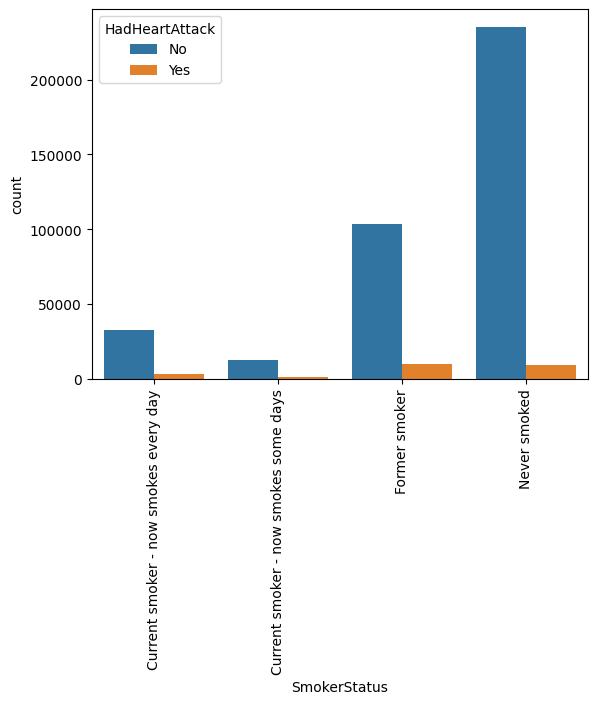

In [43]:
plt.xticks(rotation=90)
sns.countplot(data=data_raw,x='SmokerStatus', hue='HadHeartAttack')
pass

In [44]:
neverSmokeWithHeartAttack = len(data_raw[(data_raw['SmokerStatus'] == 'Never smoked') & (data_raw['HadHeartAttack'] == 'Yes')])
neverSmokeAtAll = len(data_raw[(data_raw['SmokerStatus'] == 'Never smoked')])

formerSmokeWithHeartAttack = len(data_raw[(data_raw['SmokerStatus'] == 'Former smoker') & (data_raw['HadHeartAttack'] == 'Yes')])
formerSmokeAtAll = len(data_raw[(data_raw['SmokerStatus'] == 'Former smoker')])

someSmokeWithHeartAttack = len(data_raw[(data_raw['SmokerStatus'] == 'Current smoker - now smokes some days') & (data_raw['HadHeartAttack'] == 'Yes')])
someSmokeAtAll = len(data_raw[(data_raw['SmokerStatus'] == 'Current smoker - now smokes some days')])

curSmokeWithHeartAttack = len(data_raw[(data_raw['SmokerStatus'] == 'Current smoker - now smokes every day') & (data_raw['HadHeartAttack'] == 'Yes')])
curSmokeAtAll = len(data_raw[(data_raw['SmokerStatus'] == 'Current smoker - now smokes every day')])

print("Never smoke: " + str((neverSmokeWithHeartAttack / neverSmokeAtAll) * 100))
print("Former smoker: " + str((formerSmokeWithHeartAttack / formerSmokeAtAll) * 100))
print("Current smoker - now smokes some days: " + str((someSmokeWithHeartAttack / someSmokeAtAll) * 100))
print("Current smoker - now smokes every day: " + str((curSmokeWithHeartAttack / curSmokeAtAll) * 100))

Never smoke: 3.7832123762476875
Former smoker: 8.581046636314097
Current smoker - now smokes some days: 7.016788635385278
Current smoker - now smokes every day: 8.827042190928534


Если произведем рассчеты в процентом соотношении, то те, кто никогда не курил сталкивается с сердечно-сосудистыми заболеваниямя в 2 раза реже, чем тот, кто когда-либо курил. Так же можно заметить, что бывшие курильщики и те, кто курит каждый день чаще всего сталкивается с болезнями с сердцем. С чем это можем быть связано ? Возможно, бывшие курильщики - это те, кто из-за сердечно-сосудистого заболевания бросил курить и поэтому процент таких людей довольно большой.

In [45]:
data_raw['SmokerStatus'].unique()

['Never smoked', 'Current smoker - now smokes some days', 'Former smoker', NaN, 'Current smoker - now smokes every day']
Categories (4, object): ['Current smoker - now smokes every day', 'Current smoker - now smokes some days', 'Former smoker',
                         'Never smoked']

### Количество сна

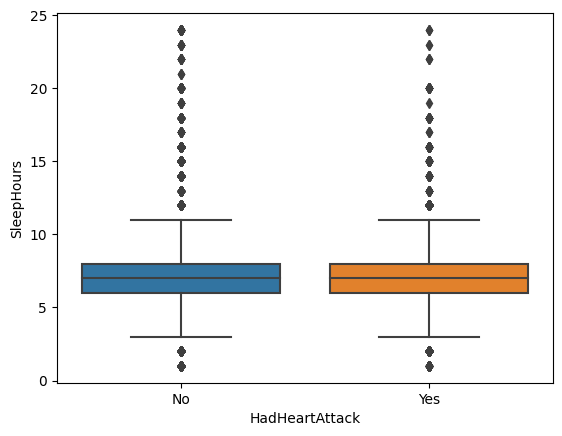

In [46]:
sns.boxplot(x="HadHeartAttack", y="SleepHours", data=data_raw)
pass

Здесь ничего сказать нельзя, классы достаточно сбалансированны в смысле количества сна.

### Алкоголь

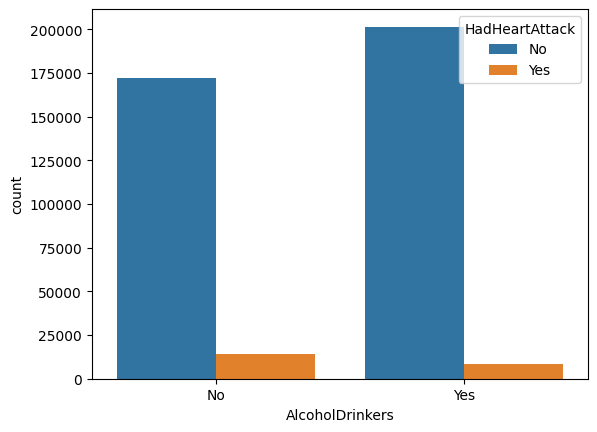

In [47]:
sns.countplot(data=data_raw,x='AlcoholDrinkers', hue='HadHeartAttack')
pass

In [48]:
alcoholDrinkersWithHeartAttack = len(data_raw[(data_raw['AlcoholDrinkers'] == 'Yes') & (data_raw['HadHeartAttack'] == 'Yes')])
alcoholDrinkersAtAll = len(data_raw[(data_raw['AlcoholDrinkers'] == 'Yes')])

nonAlcoholDrinkersWithHeartAttack = len(data_raw[(data_raw['AlcoholDrinkers'] == 'No') & (data_raw['HadHeartAttack'] == 'Yes')])
nonAlcoholDrinkersAtAll = len(data_raw[(data_raw['AlcoholDrinkers'] == 'No')])

(alcoholDrinkersWithHeartAttack / alcoholDrinkersAtAll) * 100 , (nonAlcoholDrinkersWithHeartAttack / nonAlcoholDrinkersAtAll) * 100

(4.040950064251201, 7.491460938790517)

Те, кто не пьет алкоголь страдают от сердечно-сосудистых заболеваний почти в 2 раза реже, чем те, кто его пьет.

## 4. Обработка пропущенных значений

Посмотрим сначала на то, где именно и в каких количествах имеются пропущенные значения

In [4]:
data_raw.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

Отбросим столбцы, которые, по моему мнению, являются странными и не должны на первый взгляд влиять на возникновение у человека проблем с сердцем

In [5]:
data = data_raw.drop('RemovedTeeth', axis=1).drop('DifficultyErrands', axis=1).drop('DifficultyDressingBathing', axis=1).drop('HIVTesting', axis=1).drop('FluVaxLast12', axis=1).drop('TetanusLast10Tdap', axis=1)
data = data.drop('PneumoVaxEver', axis=1).drop('DeafOrHardOfHearing', axis=1).drop('BlindOrVisionDifficulty', axis=1).drop('State', axis=1)
data.isna().sum()

Sex                            0
GeneralHealth               1198
PhysicalHealthDays         10927
MentalHealthDays            9067
LastCheckupTime             8308
PhysicalActivities          1093
SleepHours                  5453
HadHeartAttack              3065
HadAngina                   4405
HadStroke                   1557
HadAsthma                   1773
HadSkinCancer               3143
HadCOPD                     2219
HadDepressiveDisorder       2812
HadKidneyDisease            1926
HadArthritis                2633
HadDiabetes                 1087
DifficultyConcentrating    24240
DifficultyWalking          24012
SmokerStatus               35462
ECigaretteUsage            35660
ChestScan                  56046
RaceEthnicityCategory      14057
AgeCategory                 9079
HeightInMeters             28652
WeightInKilograms          42078
BMI                        48806
AlcoholDrinkers            46574
HighRiskLastYear           50623
CovidPos                   50764
dtype: int

Заполним пропущенные числовые признаки

In [6]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']])

SimpleImputer(strategy='median')

In [7]:
data[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']] = imp_num.transform(data[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']])

In [8]:
data.isna().sum()

Sex                            0
GeneralHealth               1198
PhysicalHealthDays             0
MentalHealthDays               0
LastCheckupTime             8308
PhysicalActivities          1093
SleepHours                     0
HadHeartAttack              3065
HadAngina                   4405
HadStroke                   1557
HadAsthma                   1773
HadSkinCancer               3143
HadCOPD                     2219
HadDepressiveDisorder       2812
HadKidneyDisease            1926
HadArthritis                2633
HadDiabetes                 1087
DifficultyConcentrating    24240
DifficultyWalking          24012
SmokerStatus               35462
ECigaretteUsage            35660
ChestScan                  56046
RaceEthnicityCategory      14057
AgeCategory                 9079
HeightInMeters                 0
WeightInKilograms              0
BMI                            0
AlcoholDrinkers            46574
HighRiskLastYear           50623
CovidPos                   50764
dtype: int

Отбросим строчки, в которых нет значения для признака о наличии сердечно-сосудистого заболевания, так как заполнить этот признак просто наиболее часто встречающимися значениями было бы странно

In [9]:
data = data.dropna(subset=['HadHeartAttack'])

Все оставшиеся пропущенные признаки являеются категориальными. Просто выбросить мы их не можем, так как тогда потеряем слишком много данных (в некоторых категориальных признаках количество пропущенных значений достигает 50 тысяч). Заполним такие признаки наиболее часто встречающимися.

In [10]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical = [c for c in data.columns if data[c].dtype.name == 'category']
numerical = [c for c in data.columns if data[c].dtype.name == 'float64']
imp_cat.fit(data[categorical])

SimpleImputer(strategy='most_frequent')

In [11]:
data[categorical] = imp_cat.transform(data[categorical])
data.isna().sum()

Sex                        0
GeneralHealth              0
PhysicalHealthDays         0
MentalHealthDays           0
LastCheckupTime            0
PhysicalActivities         0
SleepHours                 0
HadHeartAttack             0
HadAngina                  0
HadStroke                  0
HadAsthma                  0
HadSkinCancer              0
HadCOPD                    0
HadDepressiveDisorder      0
HadKidneyDisease           0
HadArthritis               0
HadDiabetes                0
DifficultyConcentrating    0
DifficultyWalking          0
SmokerStatus               0
ECigaretteUsage            0
ChestScan                  0
RaceEthnicityCategory      0
AgeCategory                0
HeightInMeters             0
WeightInKilograms          0
BMI                        0
AlcoholDrinkers            0
HighRiskLastYear           0
CovidPos                   0
dtype: int64

Таким образом, мы избавились от всех пропущенных значений.

## 5. Обработка категориальных признаков

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data[categorical])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [13]:
dummies = pd.DataFrame(enc.transform(data[categorical]),
                       columns=enc.get_feature_names_out(), index=data.index)
data = pd.concat((data, dummies), axis=1).drop(categorical, axis=1)

In [42]:
data.shape

(442067, 64)

### 6. Нормализация

В нашем случае нормализация нужна, так как диапазон значений числовых признаков сильно различается, причем логики в том, что какой-то числовой признак имеет большее значение на результат классификации и в целом имеет большие значения - нет. Например, рост человека имеет значения от 100 и более, а количество часов сна от 1 до 24. Но при этом, рост не является более важным признаком, чем количество часов сна в нашей задаче.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = data[numerical].copy()
scaler.fit(numerical_data)
data_numerical = pd.DataFrame(scaler.transform(numerical_data), columns=numerical, index=numerical_data.index)
data = pd.concat((data.drop(numerical, axis=1), data_numerical), axis=1)

In [41]:
data.head(5)

,Sex_Male,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,LastCheckupTime_5 or more years ago,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),...,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,0.656772,-0.024913,-0.103725,-0.156524
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,-0.687687,-0.989440,-0.725653,-0.296994
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.258523,-0.154541,-1.359916,-1.278798,-0.947980,-0.451996
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,-0.015457,-0.507176,-0.947980,-0.824968
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.258523,-0.515488,1.329001,-1.278798,-1.414181,-1.072001


In [43]:
data.describe()

,Sex_Male,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,LastCheckupTime_5 or more years ago,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),...,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,442067.000000,...,442067.00000,442067.000000,442067.000000,442067.000000,4.420670e+05,4.420670e+05,4.420670e+05,4.420670e+05,4.420670e+05,4.420670e+05
mean,0.469494,0.162018,0.134658,0.322462,0.043668,0.337193,0.042849,0.094305,0.055969,0.806878,...,0.03865,0.720237,0.030278,0.249485,-1.337289e-17,-6.917901e-17,6.300691e-17,2.678694e-15,-1.959643e-16,-3.642828e-16
std,0.499069,0.368468,0.341359,0.467419,0.204355,0.472752,0.202516,0.292253,0.229862,0.394749,...,0.19276,0.448883,0.171352,0.432715,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,-4.915301e-01,-5.154879e-01,-4.048834e+00,-7.644678e+00,-2.946964e+00,-2.646235e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,-4.915301e-01,-5.154879e-01,-6.876868e-01,-7.000818e-01,-7.256529e-01,-6.457475e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,1.000000,0.000000,0.000000,-4.915301e-01,-5.154879e-01,-1.545741e-02,-2.491267e-02,-1.037249e-01,-1.565241e-01
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,1.000000,0.000000,0.000000,-1.420199e-01,-3.422568e-02,6.567720e-01,7.467092e-01,4.295660e-01,4.198875e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,3.003572e+00,3.093979e+00,1.141244e+01,6.823231e+00,1.026974e+01,1.150088e+01


### 7. Разбиение данных на обучающую и тестовую выборки

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442067 entries, 0 to 445131
Data columns (total 64 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   Sex_Male                                                                 442067 non-null  float64
 1   GeneralHealth_Excellent                                                  442067 non-null  float64
 2   GeneralHealth_Fair                                                       442067 non-null  float64
 3   GeneralHealth_Good                                                       442067 non-null  float64
 4   GeneralHealth_Poor                                                       442067 non-null  float64
 5   GeneralHealth_Very good                                                  442067 non-null  float64
 6   LastCheckupTime_5 or more years ago                         

In [109]:
data

,Sex_Male,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,LastCheckupTime_5 or more years ago,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),...,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,0.656772,-0.024913,-0.103725,-0.156524
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,-0.687687,-0.989440,-0.725653,-0.296994
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.258523,-0.154541,-1.359916,-1.278798,-0.947980,-0.451996
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.491530,-0.515488,-0.015457,-0.507176,-0.947980,-0.824968
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.258523,-0.515488,1.329001,-1.278798,-1.414181,-1.072001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.491530,-0.154541,-0.687687,-0.507176,-0.637016,-0.448766
445128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.258523,-0.274857,-0.015457,-0.024913,0.007439,0.040457
445129,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.003572,3.093979,-1.359916,-0.024913,-1.613982,-1.805029
445130,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.491530,-0.515488,-1.359916,1.228973,1.273331,0.668536


Разобьем данные на обучающую и тестовую выборки в следующем соотношении: 70% - обучение, 30% - тест.

In [127]:
y = data['HadHeartAttack_Yes'] # сохраняем данные о метках в отдельный вектор
X = data # отбрасываем его из наших признаков
X = X.drop('HadHeartAttack_Yes', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 37, shuffle=True)


In [124]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(309446, 63) (132621, 63) (309446,) (132621,)
(array([0., 1.]), array([291860,  17586]))
(array([0., 1.]), array([125099,   7522]))


### 8. Обучение модели

Для обучения будем использовать метод k-ближайших соседей, который является одним из простейших методов решения задачи классфикации. Плюсом данного метода является простота понимания работы, его слабая чувствительность к выбросам. Минусом - чувствителен к дисбалансу в классах.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

Попробуем выбрать число соседей, равных 7

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
acc_train, mse_train

In [ ]:
acc_test = accuracy_score(y_test, y_test_predict)
mse_test = mean_squared_error(y_train, y_train_predict)
acc_test, mse_test

Попробуем выбрать число соседей, равных 5

In [116]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [117]:
acc_train = accuracy_score(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
acc_train, mse_train

(0.9683079475192279, 0.03169205248077213)

In [118]:
acc_test = accuracy_score(y_test, y_test_predict)
mse_test = mean_squared_error(y_train, y_train_predict)
acc_test, mse_test

(0.9596667603822302, 0.03169205248077213)

Попробуем выбрать число соседей, равных 10

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
acc_train, mse_train

### Выводы

* В среднем мужчины сталкиваются с сердечно-сосудистыми заболеваниями чаще, чем женщины.
* Сердечно-сосудистым заболеваниям больше всего подвержены люди старше 80-ти лет, а так же люди, чей возраст находится в промежутке между 70-ью и 74-мя годами.
* В среднем, проблемы с сердцем возникают в 2 раза чаще у физически неактивных людей, чем у активных.
* Тот, кто никогда не курил сталкивается с сердечно-сосудистыми заболеваниями в 2 раза реже, чем тот, кто когда-либо это делал. Так же можно заметить, что бывшие курильщики и те, кто курит каждый день чаще других сталкиваются с проблемами с серцдем. С чем может быть связано то, что бывшие курильщики чаще подвержены риску возникновения сердечно-сосудистых заболеваний ? Возможно, бывшие курильщики - это те, кто из-за какого-либо заболевания, связанного с серцдем бросил курить и после этого стак активно следить за своим здоровьем, в том числе участвовать в такого рода опросах.
* Количество сна в среднем не влияло на возникновение заболеваний.
* Тот, кто не пьет алкоголь сталкивается с сердечно-сосудистыми заболеваниями почти в 2 раза реже, чем тот, кто пьет.
* При решении задачи классификации использовался алгоритм k-ближайших соседей. Число k — это количество соседних объектов в пространстве признаков, которые сравниваются с классифицируемым объектом. K является гиперпараметром данного алгоритма и требует аккуратного подбора для достижения хорошей точности работы. Для этого могут использоваться эвристические методы, либо практические, как это сделали мы. В нашем случае, наилучшим выбором гиперпараметра k стало значение равное 5-ти. При таком значении удалось достигнуть значения MSE = 0.027, что является неплохим результатом, учитывая достаточно большое количество пропущенных значений и несбалансированность классов.

# Logistic Regression

In [128]:
# импортируем модель линейной регрессии
from sklearn.linear_model import LogisticRegression
# матрица рассогласования
from sklearn.metrics import confusion_matrix
# для подбора оптимального значения гиперпараметров
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import balanced_accuracy_score

Подбираем оптимальное значение гиперпараметра С

In [129]:
# n_jobs = -1 для обучения модели на всех ядрах
logreg_model = LogisticRegression(n_jobs=-1)
# 20 значений в интервале от 10^(-5) до 10^5
param_grid = {'C': np.logspace(-5, 5, 20)}
# logreg_mode - модель, для которой ищем оптимальное значение параметров
# param_grid - сетка значений для гиперпараметра C
grid_search = GridSearchCV(logreg_model, param_grid, n_jobs=-1)
# Обучение модели
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])})

In [130]:
# узнаем лучшее найденное значение для логистической регрессии
print(grid_search.best_params_)

{'C': 0.004281332398719391}


Обучение модели с использованием самого оптимального значения гиперпараметра С

In [131]:
# обучаем модель с оптимлаьным значением гиперпараметра
opt_logreg_model = LogisticRegression(C=grid_search.best_params_['C'])
opt_logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.004281332398719391)

In [152]:
err_train = np.mean(y_train != opt_logreg_model.predict(X_train))
err_test  = np.mean(y_test  != opt_logreg_model.predict(X_test))
print('Ошибка на train, test: ')
print(err_train, err_test, end='\n')


Ошибка на train, test: 
0.054019118036749546 0.052993115720738046


Confusion matrix

In [133]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, opt_logreg_model.predict(X_test)))

[[124056   1161]
 [  5867   1537]]


In [134]:
errors_array = []
for c in param_grid['C']:
  model = LogisticRegression(C = c)
  model.fit(X_train, y_train)
  y_test_predict = model.predict(X_test)
  current_error = np.mean(y_test != y_test_predict)
  errors_array.append(current_error)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

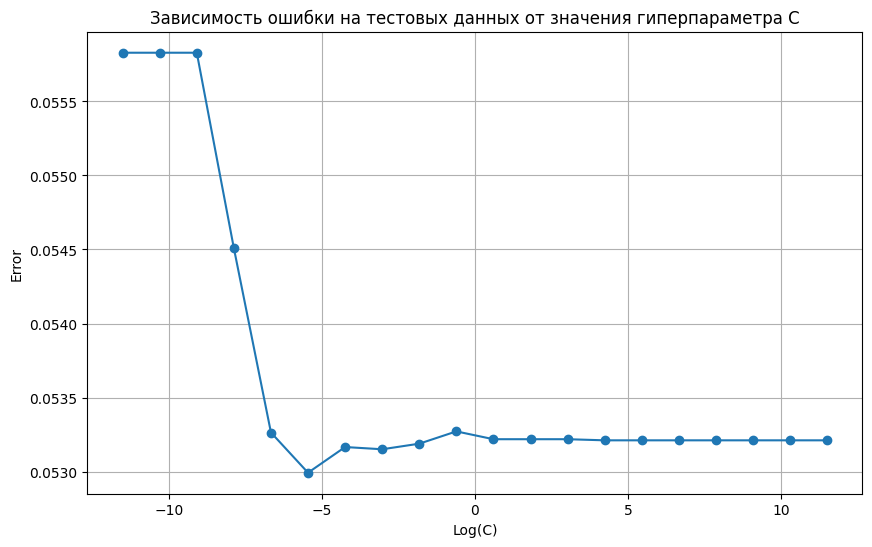

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(np.log(param_grid['C']), errors_array, marker='o')
plt.title('Зависимость ошибки на тестовых данных от значения гиперпараметра C')
plt.xlabel('Log(C)')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Neural Network

In [138]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

In [139]:
# создаем нейронную сеть с 2 скрытыми слоями, в первом 120 нейронов, во втором 40. Функция активации - RELU
nn_model = MLPClassifier(hidden_layer_sizes = (120,40),
                          activation = 'relu',
                          random_state = 37)
nn_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(120, 40), random_state=37)

In [140]:
err_train = np.mean(y_train != nn_model.predict(X_train))
err_test  = np.mean(y_test  != nn_model.predict(X_test))
print('Ошибка на train, test: ')
print(err_train, err_test, end='\n')

Ошибка на train, test: 
0.035699281942568335 0.06335346589152548


Confusion matrix

In [141]:
print(confusion_matrix(y_test, opt_logreg_model.predict(X_test)))

[[124056   1161]
 [  5867   1537]]


# Random Forest

In [105]:
from sklearn import ensemble

Random forest с числом деревьев равных 120

In [143]:

random_forest = ensemble.RandomForestClassifier(n_estimators = 120, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, n_jobs=-1)

In [144]:
err_train = np.mean(y_train != random_forest.predict(X_train))
err_test  = np.mean(y_test  != random_forest.predict(X_test))
print(err_train, err_test)

0.0002488317832513589 0.05351339531446754


Confusion matrix

In [145]:
print(confusion_matrix(y_test, opt_logreg_model.predict(X_test)))

[[124056   1161]
 [  5867   1537]]


Random forest с числом деревьев равных 240 (попробуем увеличить в 2 раза относительно начального в 120)

In [146]:
random_forest = ensemble.RandomForestClassifier(n_estimators = 240, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=240, n_jobs=-1)

In [147]:
err_train = np.mean(y_train != random_forest.predict(X_train))
err_test  = np.mean(y_test  != random_forest.predict(X_test))
print(err_train, err_test)

0.00024236862005002488 0.053362589635125655


Confusion matrix

In [148]:
print(confusion_matrix(y_test, opt_logreg_model.predict(X_test)))

[[124056   1161]
 [  5867   1537]]


Random forest с числом деревьев равных 60 (попробуем уменьшить в 2 раза относительно начального в 120)

In [149]:
random_forest = ensemble.RandomForestClassifier(n_estimators = 60, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, n_jobs=-1)

In [150]:
err_train = np.mean(y_train != random_forest.predict(X_train))
err_test  = np.mean(y_test  != random_forest.predict(X_test))
print(err_train, err_test)

0.0005105898929053858 0.05351339531446754


Confusion matrix

In [151]:
print(confusion_matrix(y_test, opt_logreg_model.predict(X_test)))

[[124056   1161]
 [  5867   1537]]


# Выводы
В данной лабораторной работе мы решили задачу классификации тремя различными подходами: логистической регрессией, полносвязной нейронной сетью и случайным лесом. Для логистической регрессии мы подобрали наиболее оптимальное значение гиперпараметра С(параметр регуляризации) и построили график зависимости ошибки на тестовых данных от значения гиперпараметра. При найденном значении удалось достигнуть точности в 95% на тестовых и тренировочных данных.

Полносвязная нейронная сеть с 2-мя скрытыми слоями (120 и 40 нейронов) показала хорошую точность на тренировочных данных (97%), но на тестовых показала лишь 94%.

Для случайного леса были проведены 3 попытки обучения со значениями гиперпараметра (числа деревьев) равных 120, 240 и 60. Но в целом они все показали примерно одинаковые результаты(95% точности на тестовых и 99.9% на тренировочных) Это может свидетельствовать о возможном небольшом переобучении, но несмотря на это, точность и на тестовых данных оказалась достаточно велика.

Итого: лучшими методами решения задачи классификации для нашей задачи оказались логистическая регрессия и алгоритм случайного леса. Чуть хуже показала себя нейроннная сеть. Но даже в худшем случае мы достигли точности в не менее, чем 94%, что является хорошим результатом.